In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error

In [ ]:
data = pd.read_csv('Oil.csv')
data_predicted = pd.read_csv('Predictions.csv')

data = data.drop('Conduit', axis=1)

# Extract column names:
columns_1 = data.columns
columns_2 = data_predicted.columns

In [ ]:
# Convert data back to pandas DataFrame
data_df = pd.DataFrame(data, columns=columns_1)
data_predicted_df = pd.DataFrame(data_predicted, columns=columns_2)

In [ ]:
# Clean data and convert to numeric:
data_numeric = data_df.iloc[:, -6:].apply(pd.to_numeric, errors='coerce').dropna()

data_predicted_numeric = data_predicted_df.iloc[:].apply(pd.to_numeric, errors='coerce').dropna()

data_predicted_numeric = data_predicted_numeric.drop('Unnamed: 0', axis=1)

In [ ]:
data_numeric

,24,25,26,27,28,29
0,909.000000,1320.420331,729.002378,903.909907,739.329457,666.767566
1,660.638547,737.269437,699.467880,838.900327,740.467059,589.404389
2,566.643205,534.419385,533.791257,491.617393,416.750011,617.590538
3,816.102529,629.786551,697.032886,767.210371,1237.043512,1403.307172
4,849.070027,870.017589,840.236876,1165.467278,1093.785654,957.763577
...,...,...,...,...,...,...
4223,287.385931,299.673599,293.388598,309.682698,296.742854,260.865139
4224,223.262233,277.969220,235.895972,234.349958,253.098471,301.540122
4225,914.501661,892.352913,925.336595,822.447519,854.463411,876.249834
4226,778.994259,906.371088,773.664652,691.003269,578.913245,540.218978


In [ ]:
data_predicted_numeric

,0,1,2,3,4,5
0,858.00250,824.58450,808.33650,787.96080,762.44586,755.67096
1,638.95780,613.40090,600.54580,586.62350,568.09100,563.75635
2,579.61330,557.73456,547.35425,532.80347,515.51120,510.78040
3,546.72240,525.08440,514.70490,503.30328,487.39822,483.59790
4,1269.23940,1223.68650,1204.28360,1168.74560,1128.94200,1115.69120
...,...,...,...,...,...,...
4223,258.87457,254.06738,241.28654,214.17325,207.73564,206.31694
4224,231.96263,226.96747,216.83174,193.71790,187.53056,185.97266
4225,756.99280,728.84875,716.95337,698.93900,675.80270,668.82550
4226,812.83500,783.01830,769.41510,747.25500,722.35220,714.73620


In [ ]:
# Replace negative values with zeros:
data_numeric = data_numeric.clip(lower=0)

data_predicted_numeric = data_predicted_numeric.clip(lower=0)


print("Length of data_numeric:", len(data_numeric))
print("Length of data_predicted_numeric:", len(data_predicted_numeric))

data_numeric = data_numeric.iloc[:len(data_predicted_numeric)]

msle = mean_squared_log_error(data_numeric, data_predicted_numeric)

r2 = r2_score(data_numeric, data_predicted_numeric)

print("MSLE:", msle)
print("R2:", r2)

Length of data_numeric: 4228
Length of data_predicted_numeric: 4228
MSLE: 0.44942472477728423
R2: 0.9238699517813088


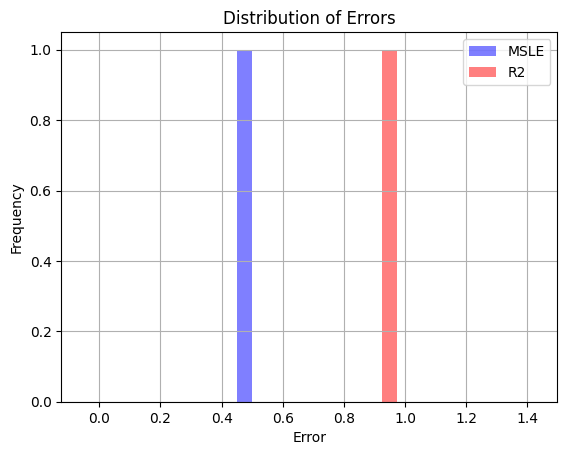

In [ ]:
plt.hist(msle, bins=20, color='blue', alpha=0.5, label='MSLE')
plt.hist(r2, bins=20, color='red', alpha=0.5, label='R2')
plt.legend()
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.grid(True)
plt.show()

In [ ]:
# Initialize empty lists to store MSLE and R2 values
msle_values = []
r2_values = []

# Iterate through each row of data_numeric and data_predicted_numeric
for i in range(len(data_numeric)):
    # Extract the current row from both datasets
    row_numeric = data_numeric.iloc[i]
    row_predicted_numeric = data_predicted_numeric.iloc[i]

    # Calculate MSLE for the current pair of rows
    msle_row = mean_squared_log_error(row_numeric, row_predicted_numeric)

    # Calculate R2 score for the current pair of rows
    r2_row = r2_score(row_numeric, row_predicted_numeric)

    # Append the MSLE and R2 values to their respective lists
    msle_values.append(msle_row)
    r2_values.append(r2_row)

# Print or use msle_values and r2_values as needed
print("MSLE values for each row:", msle_values)
print("R2 values for each row:", r2_values)
print(len(r2_values))

MSLE values for each row: [0.04509788287883185, 0.04293173763050694, 0.015060808988531307, 0.40982944493468326, 0.07183552160575576, 0.11544805617281369, 0.02602546941929008, 0.010943766757793927, 0.00767705524894896, 0.04765167416824035, 0.1480921001418216, 0.032753009915896435, 0.14465083063593984, 0.021543824327596398, 0.1249743835118871, 0.18160482281869492, 1.4598405101218328, 0.2991720407121776, 0.012643350821429826, 0.16099996458317387, 0.00479158370662014, 0.21073485544912987, 0.17789199133682465, 0.2078136362007458, 0.6529482792501393, 0.2706344111568153, 0.04819241663392928, 0.030009141108128995, 0.046257648223091745, 0.05510592314335067, 0.02949718682639181, 0.03396066379721253, 0.008737065254390204, 0.017040875728394394, 0.006814279886991886, 0.054337897506467135, 0.011578120459132044, 0.003141948006074624, 0.007511749736583299, 0.010267104296691991, 0.28910862882701305, 0.40888059942838195, 0.09104258375038358, 0.02279676157688512, 0.019289205270315274, 0.1764132393218204,

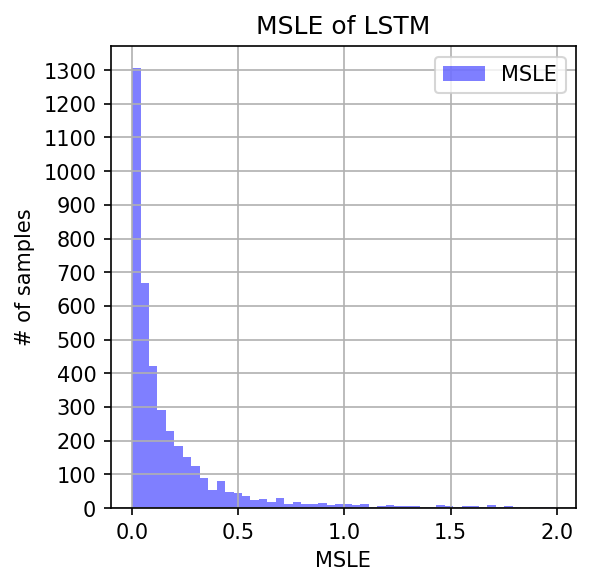

In [ ]:
# Convert msle_values to a numpy array
msle_values = np.array(msle_values)

# Filter MSLE values lower than 2
msle_values_filtered = msle_values[msle_values < 2]

# Check if there are any values left after filtering
if len(msle_values_filtered) > 0:

    plt.figure(figsize=(4, 4), dpi=150)
    plt.hist(msle_values_filtered, bins=50, color='blue', alpha=0.5, label='MSLE')
    plt.title('MSLE of LSTM')
    plt.xlabel('MSLE')
    plt.ylabel('# of samples')
    plt.yticks(np.arange(0, 1400, step=100))
    plt.legend()
    plt.grid(True)
    plt.show()

else:

    print("No MSLE values lower than 2 to plot.")

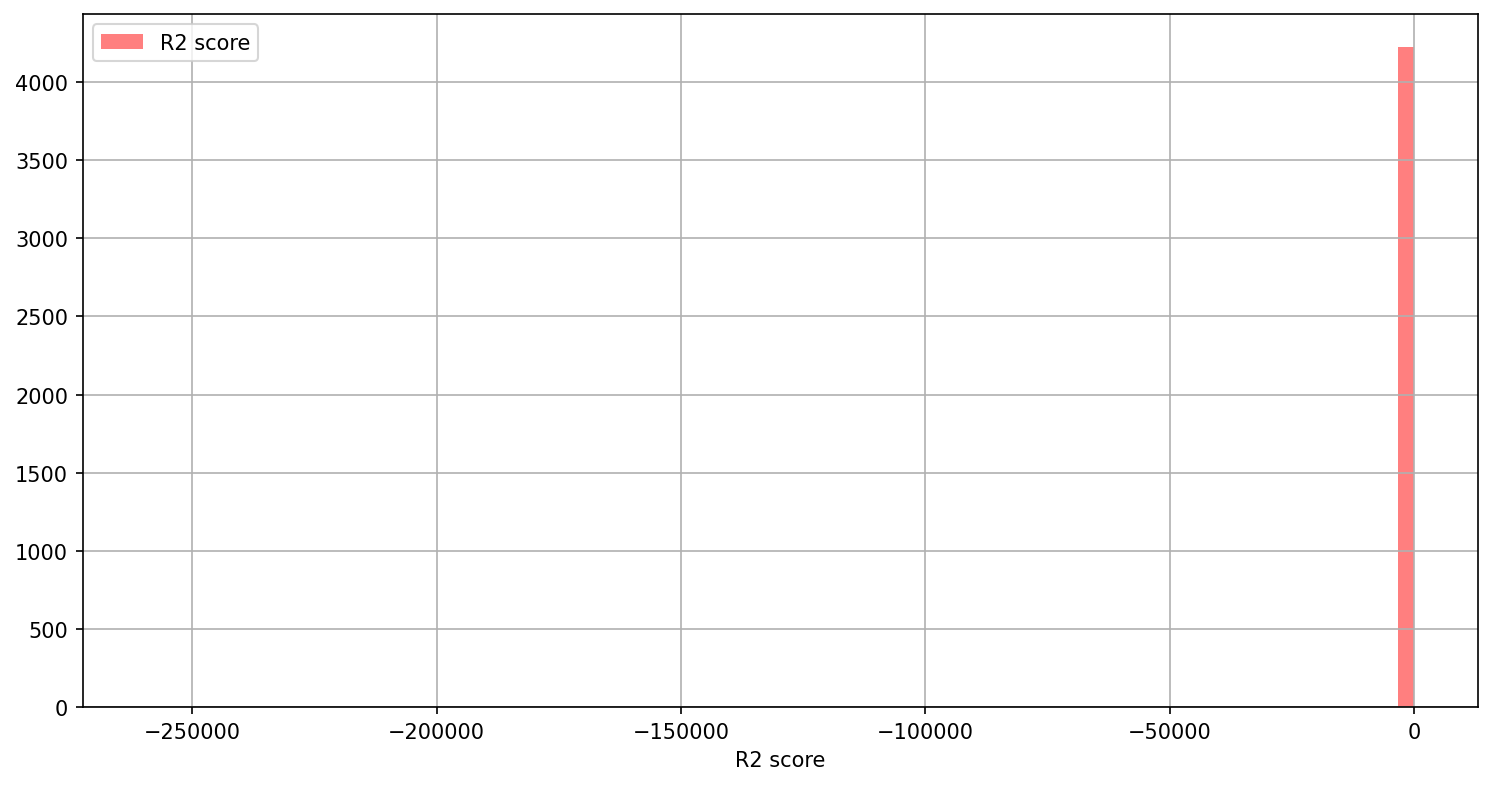

max R2 = 0.8551730888111474 min R2 = -259449.51585229396


In [ ]:
plt.figure(figsize=(12, 6), dpi=150)
plt.hist(r2_values, bins=80, color='red', alpha=0.5, label='R2 score')
plt.xlabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()
print(f'max R2 = {max(r2_values)}, min R2 = {min(r2_values)}')

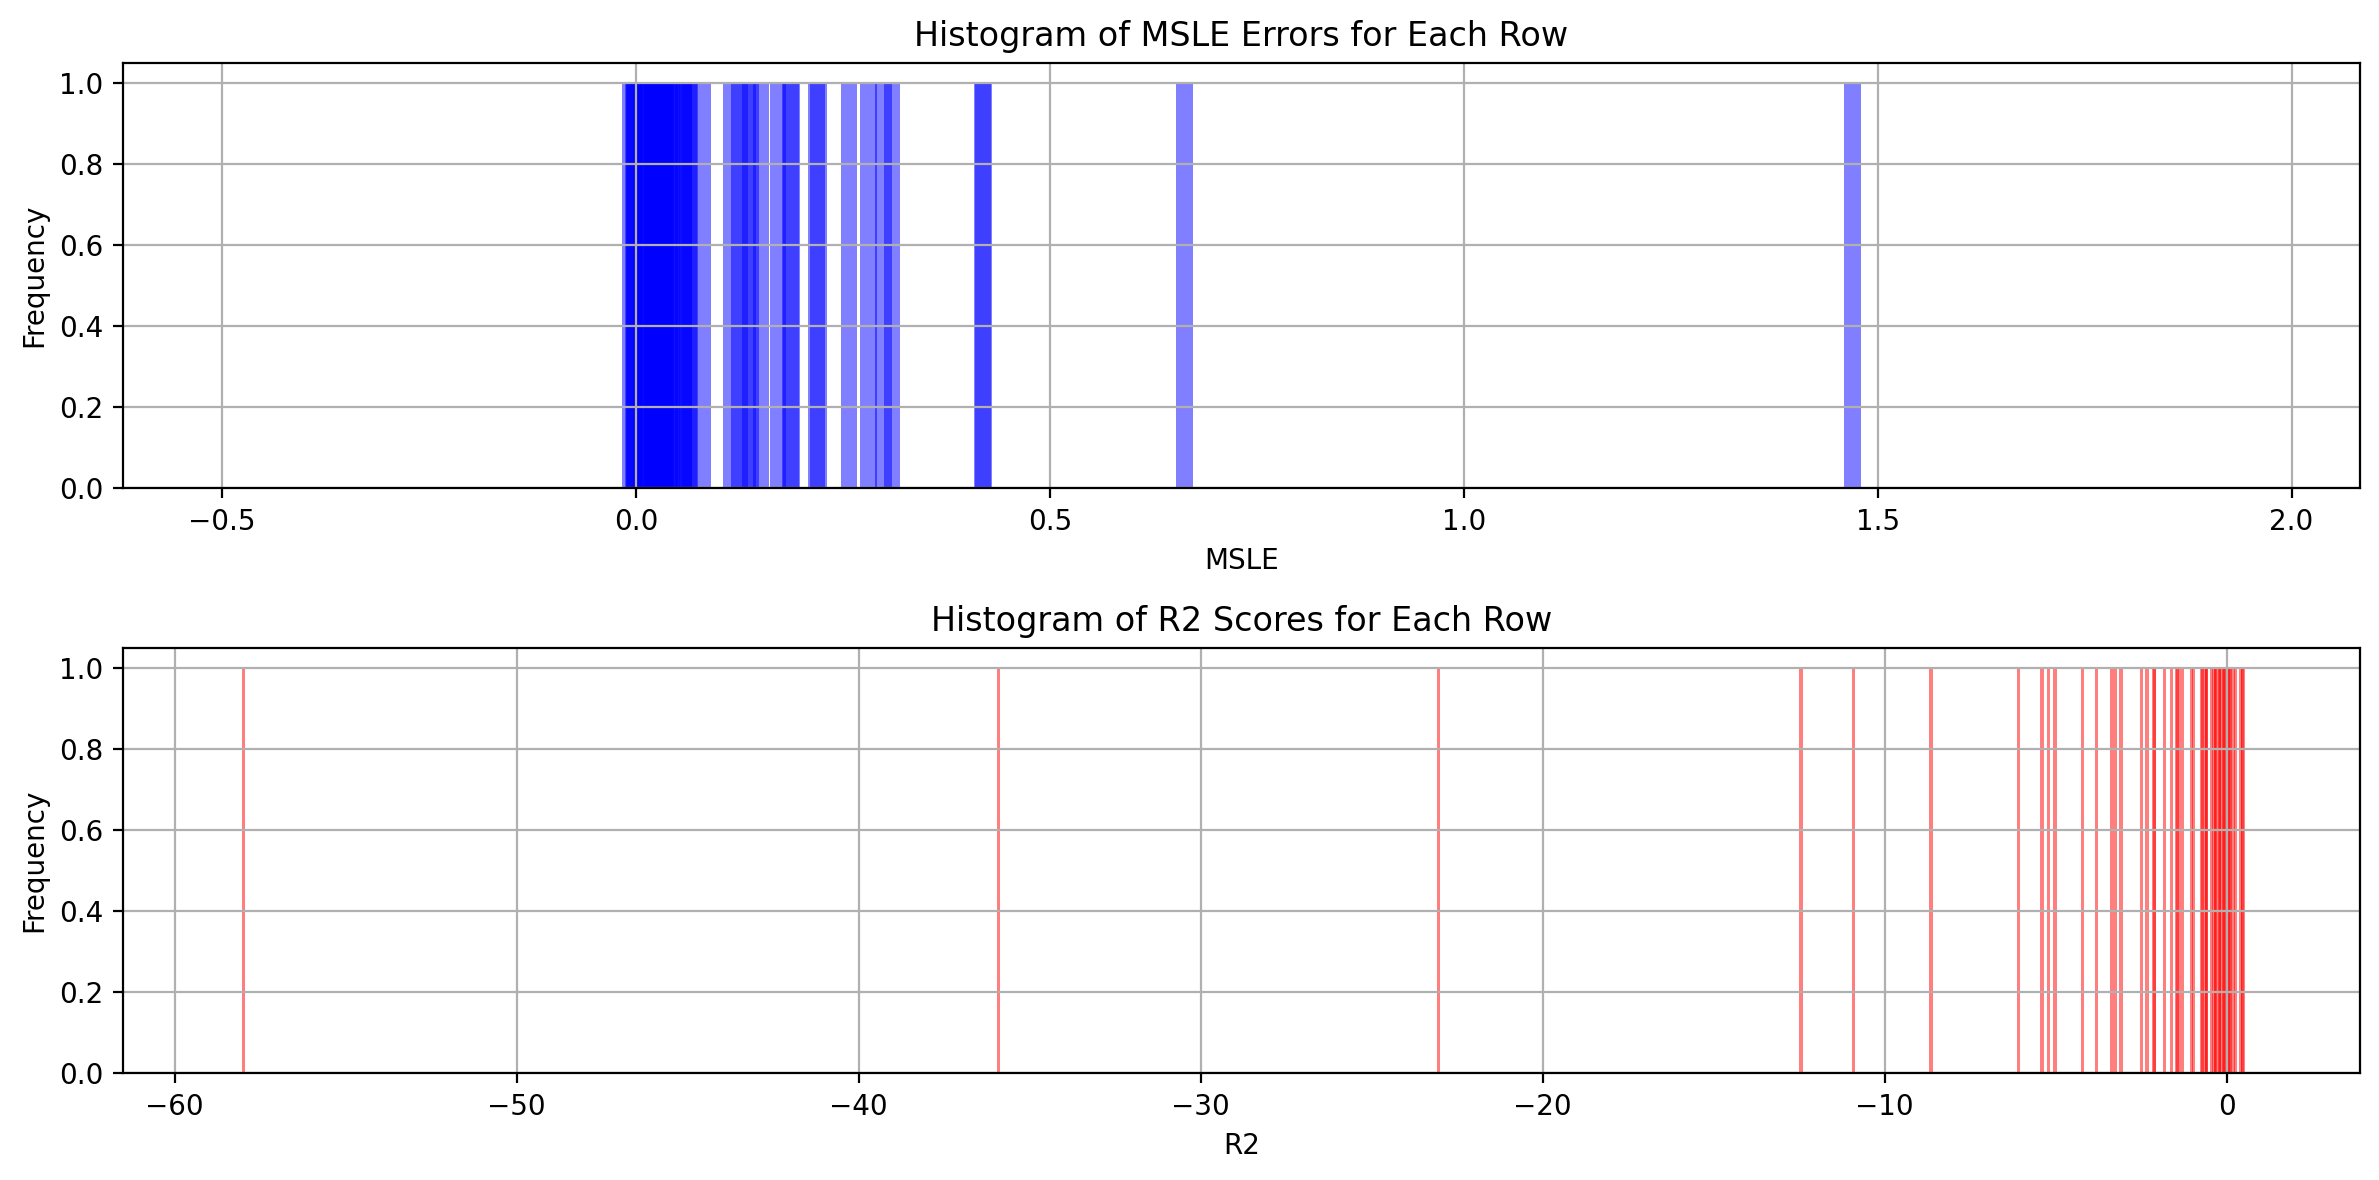

In [ ]:
# Define the number of bins for the histograms
#num_bins = 50

# Plot histograms for MSLE values
plt.figure(figsize=(12, 6), dpi=200)
for i, msle_row in enumerate(msle_values[:50]):
    plt.subplot(2, 1, 1)  # Two rows of plots, first plot
    plt.hist(msle_row, bins=50, color='blue', alpha=0.5, label=f'Row {i+1}')

# Add labels and title for the MSLE histogram
plt.xlabel('MSLE')
plt.ylabel('Frequency')
plt.title('Histogram of MSLE Errors for Each Row')

plt.grid(True)

# Plot histograms for R2 values
plt.subplot(2, 1, 2)  # Two rows of plots, second plot
for i, r2_row in enumerate(r2_values[:50]):
    plt.hist(r2_row, bins=10, color='red', alpha=0.5, label=f'Row {i+1}')

# Add labels and title for the R2 histogram
plt.xlabel('R2')
plt.ylabel('Frequency')
plt.title('Histogram of R2 Scores for Each Row')

plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Step 4: Divide samples into groups
msle_thresholds = [0.1, 0.5, 1.0]  # Define thresholds for MSLE groups
r2_thresholds = [0.7, 0.5, 0.3]     # Define thresholds for R2 groups

# Step 5: Describe the groups
# Analyze characteristics of sites falling into different groups

# Step 6: Identify objects with largest errors
max_msle_index = msle.argmax()
min_r2_index = r2.argmin()
objects_with_largest_errors = data.iloc[[max_msle_index, min_r2_index]]

In [ ]:
array = np.load('2 clusters.npy')

In [ ]:
for i in array:
  array_sum = np.sum(array)

print('Sum of array is:', array_sum)

Sum of array is: 2301


In [ ]:
df = pd.DataFrame(array)

print(df)

      0
0     0
1     0
2     0
3     0
4     0
...  ..
4223  1
4224  1
4225  0
4226  0
4227  0

[4228 rows x 1 columns]


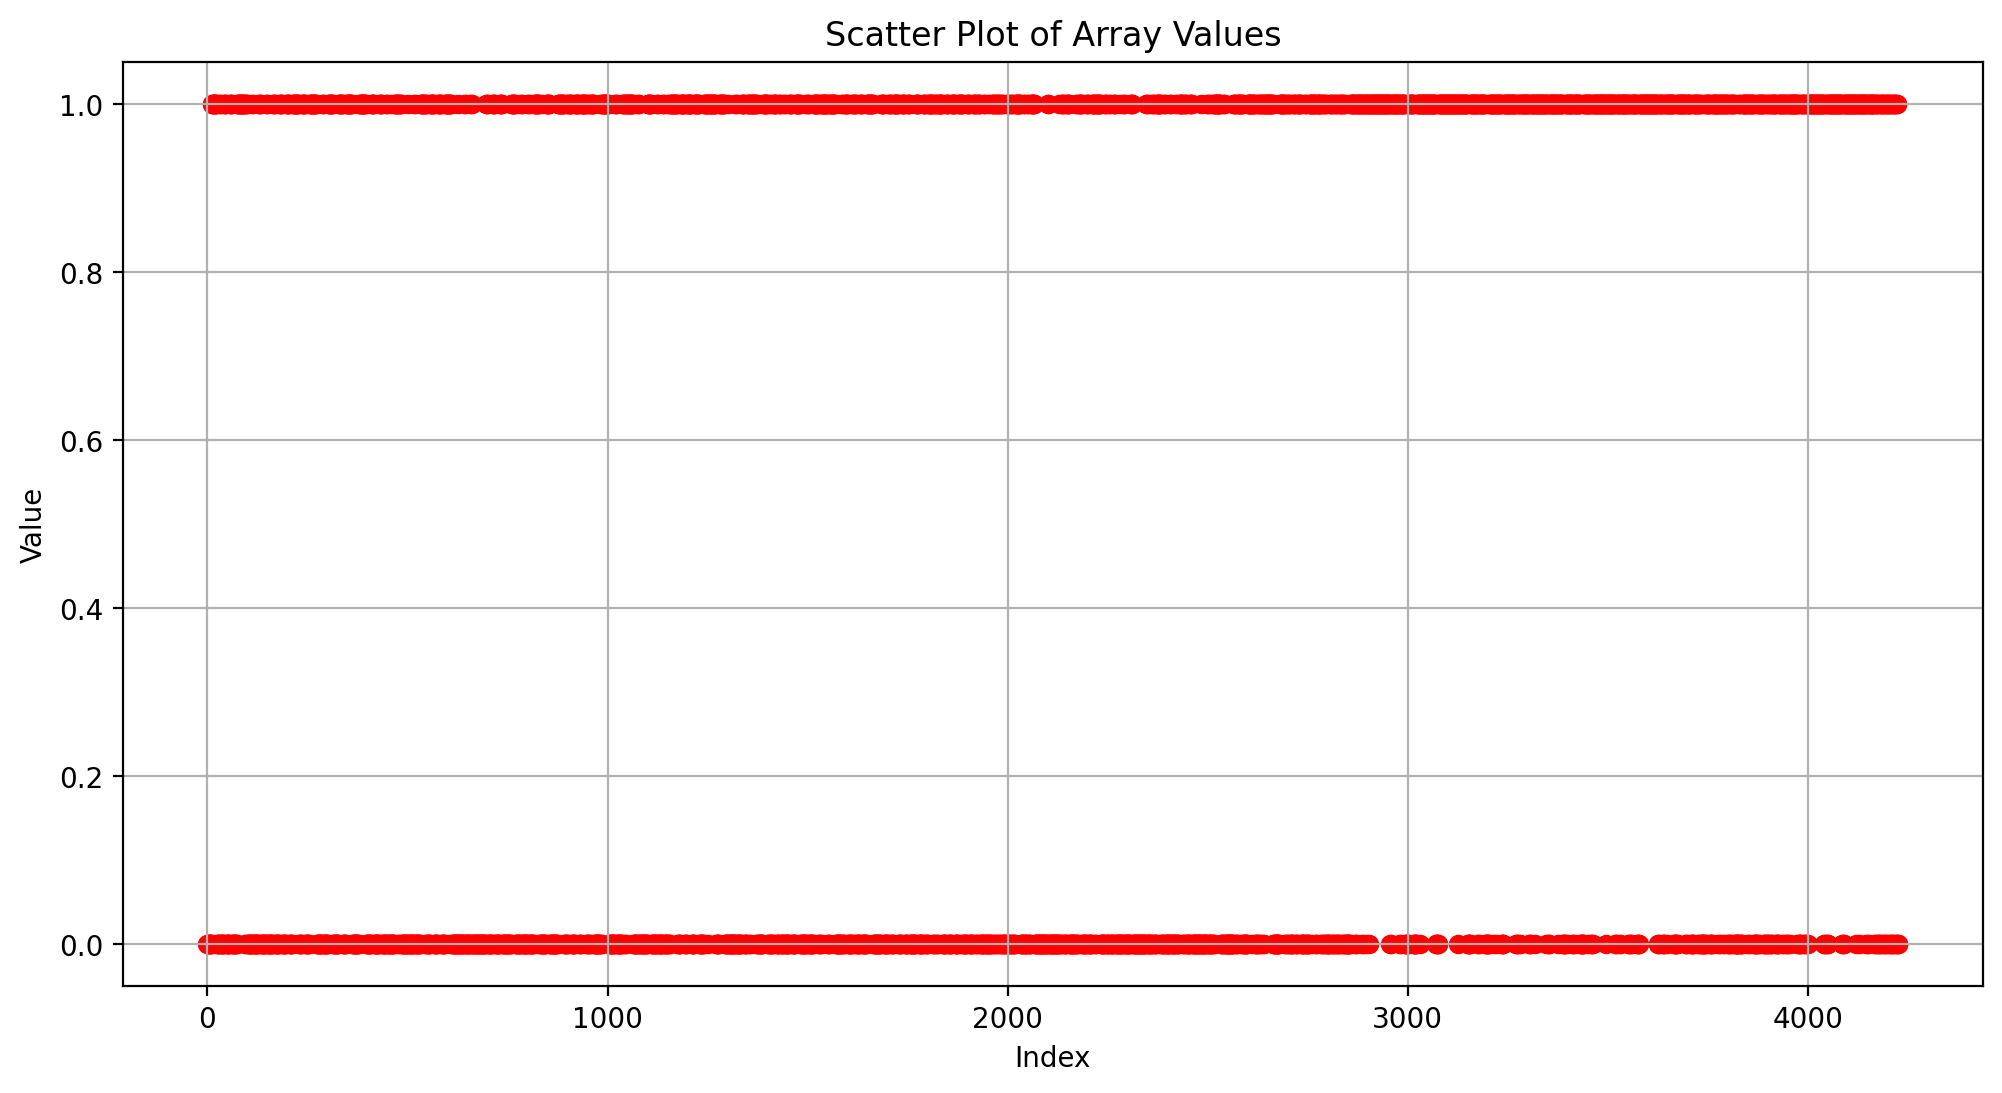

In [ ]:
indices = np.arange(len(array))

plt.figure(figsize=(12, 6), dpi=200)
# Scatter plot
plt.scatter(indices, array, color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Array Values')
plt.grid(True)
plt.show()

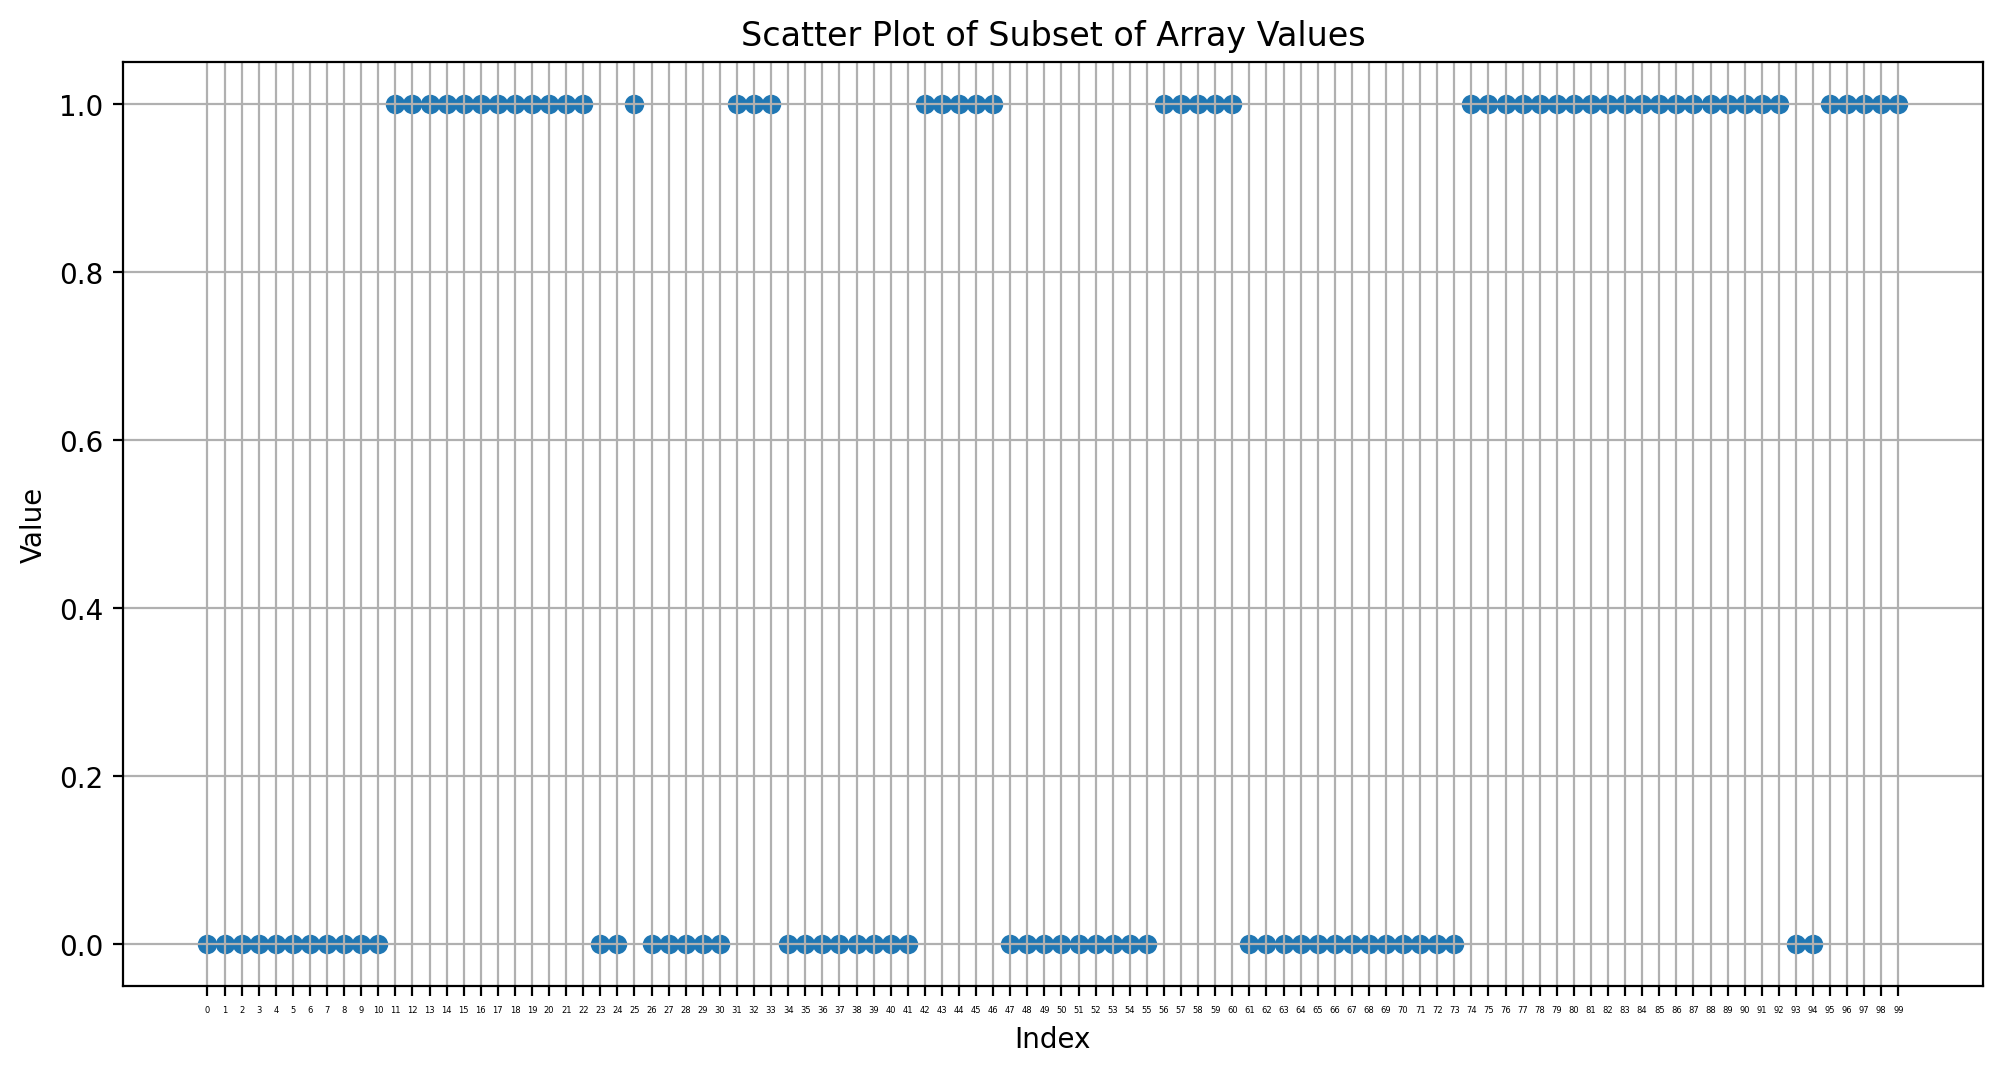

In [ ]:
# Define the range of indices for the subset
start_index = 0
end_index = 100  # Change this to adjust the size of the subset

# Slice the array to select the subset
subset_array = array[start_index:end_index]

# Create x-axis indices for the subset
indices = np.arange(start_index, end_index, step=1)

plt.figure(figsize=(12, 6), dpi=200)
# Scatter plot of the subset
plt.scatter(indices, subset_array)
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(indices, fontsize=3)  # Adjust x-axis tick font size
plt.xticks(np.arange(start_index, end_index, step=1))  # Adjust x-axis ticks
plt.title('Scatter Plot of Subset of Array Values')
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objs as go
import numpy as np

# Load the array
array = np.load('2 clusters.npy')

# Define the range of indices for the subset
start_index = 0
end_index = 1001  # Change this to adjust the size of the subset

# Slice the array to select the subset
subset_array = array[start_index:end_index]

# Create x-axis indices for the subset starting from 0 with a step size of 1
indices = np.arange(start_index, end_index, step=1)

# Create a trace for the scatter plot
trace = go.Scatter(
    x=indices,
    y=subset_array,
    mode='markers',
    marker=dict(
        size=8,
        color='blue',  # You can change the color if needed
    ),
)

# Create a layout
layout = go.Layout(
    title='Scatter Plot of Subset of Array Values',
    xaxis=dict(title='Index of sample'),
    yaxis=dict(title='Value (cluster; orange=1, blue=0)'),
)

# Create the figure and plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [ ]:
data = pd.read_csv('Oil.csv')

labels = data.Conduit
X = data.drop('Conduit', axis=1)
n = len(X)

i = data.num
Y = X.values

cluster_zero, cluster_one = [], []
lbl_zero, lbl_one = [], []

indices_tmp = [i for i in range(len(Y[:]))]
for i in indices_tmp:
  if array[i] == 0:
    cluster_zero.append(array[i])
    lbl_zero.append(labels[i])
  else:
    cluster_one.append(array[i])
    lbl_one.append(labels[i])

print('Cluster 1:', lbl_one)
print('Cluster 0:', lbl_zero)

Cluster 1: ['Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-1', 'Sk-1', 'Sk-1', 'Sk-1', 'Sk-1', 'Sk-1', 'Sk-2', 'Sk-2', 'Sk-2', 'Sk-4', 'Sk-4', 'Sk-4', 'Sk-4', 'Sk-4', 'Sk-9', 'Sk-9', 'Sk-9', 'Sk-9', 'Sk-9', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-11', 'Sk-12', 'Sk-12', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-25', 'Sk-25', 'Sk-25', 'Sk-25', 'Sk-25', 'Sk-25', 'Sk-25', 'Sk-25', 'Sk-26', 'Sk-26', 'Sk-26', 'Sk-26', 'Sk-26', 'Sk-26', 'Sk-26', 'Sk-26', 'Sk-26

In [ ]:
df = pd.DataFrame(lbl_one)
df

,0
0,Sk-0
1,Sk-0
2,Sk-0
3,Sk-0
4,Sk-0
...,...
2296,Sk-798
2297,Sk-798
2298,Sk-801
2299,Sk-801


In [ ]:
df = pd.DataFrame(lbl_zero)
df

,0
0,Sk-0
1,Sk-0
2,Sk-0
3,Sk-0
4,Sk-0
...,...
1922,Sk-799
1923,Sk-799
1924,Sk-802
1925,Sk-802


In [ ]:
array_1 = lbl_zero
array_2 = lbl_one

from collections import Counter

# Create a set of unique values from array1
unique_values = set(array_1)

# Count the occurrences of each value in array1
value_counts = Counter(array_1)

# Create a new array with only the different values from array1 that are repeated more than once
new_array = []
for i, value in enumerate(array_1):
    if value not in unique_values:
        if value_counts[value] > 2:
            new_array.append(value)
    else:
        unique_values.remove(value)

print(new_array)

print(len(new_array))

# Create a set of unique values from array2
unique_values = set(array_2)

# Count the occurrences of each value in array2
value_counts = Counter(array_2)

# Create a new array with only the different values from array2 that are repeated more than once
new_array = []
for i, value in enumerate(array_2):
    if value not in unique_values:
        if value_counts[value] > 2:
            new_array.append(value)
    else:
        unique_values.remove(value)

print(new_array)

print(len(new_array))

['Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-0', 'Sk-2', 'Sk-2', 'Sk-2', 'Sk-2', 'Sk-3', 'Sk-3', 'Sk-3', 'Sk-3', 'Sk-3', 'Sk-3', 'Sk-3', 'Sk-7', 'Sk-7', 'Sk-7', 'Sk-7', 'Sk-7', 'Sk-7', 'Sk-7', 'Sk-7', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-10', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-12', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-13', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-17', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-19', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-22', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-23', 'Sk-24', 'Sk-24', 'Sk-24', 'Sk-24', 'S